In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('survey.csv')

house_categorical_df = df.select_dtypes(exclude=[np.number])
house_numerical_df = df.select_dtypes(include=[np.number])

print("Names of categorical variables:")
for name in list(house_categorical_df.columns):
    print(name)

print()

print("Names of numerical variables:")
for name in list(house_numerical_df.columns):
    print(name)

print()
print("Number of records in dataframe: ", len(df))
print()

df.head()

Names of categorical variables:
Timestamp
Gender
Country
state
self_employed
family_history
treatment
work_interfere
no_employees
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence
comments

Names of numerical variables:
Age

Number of records in dataframe:  1259



,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df['Gender'].value_counts()

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

In [6]:
df['Gender'] = df['Gender'].replace(['m', 'M', 'Male', 'Male '], 'male')
df['Gender'] = df['Gender'].replace(['f', 'F', 'Female', 'Female '], 'female')

#zastosowanie filtru i stworzenie nowego dataframe, które będzie miało w polu "Gender" jedynie "male" lub "female"
df = df[df['Gender'].isin(['male', 'female'])]

print("Number of records in dataframe after removing some records: ", len(df))

Number of records in dataframe after removing some records:  1212


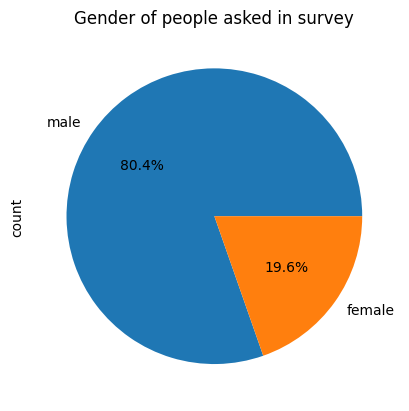

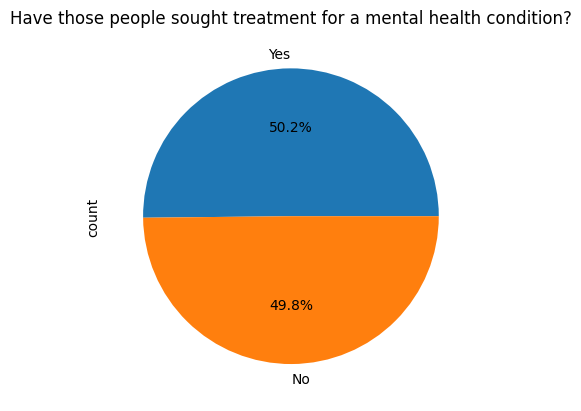

In [7]:
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender of people asked in survey')

plt.show()

df['treatment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Have those people sought treatment for a mental health condition?')

plt.show()

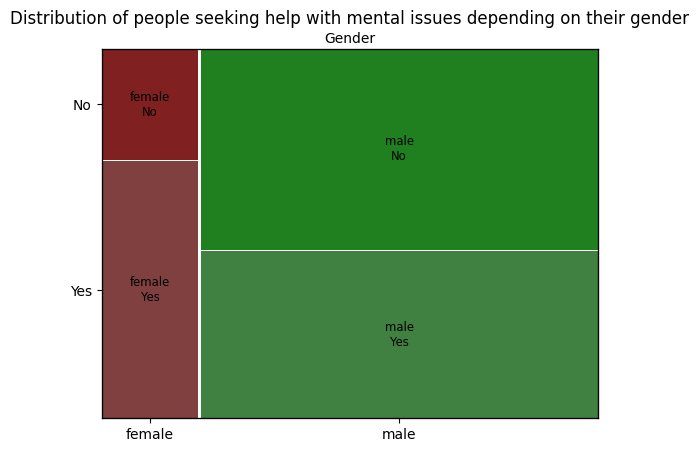

In [8]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['Gender', 'treatment'])

plt.title('Distribution of people seeking help with mental issues depending on their gender')
plt.xlabel('Gender')
plt.ylabel('Treatment')

plt.show()

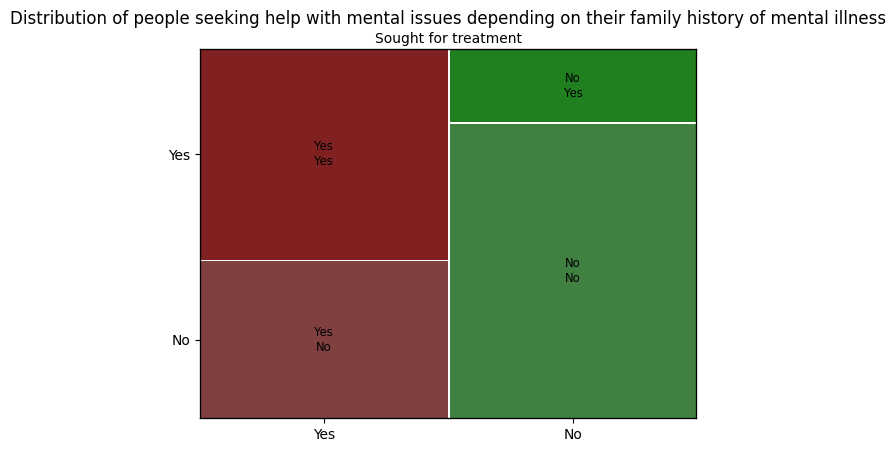

In [9]:
mosaic(df, ['treatment', 'family_history'])

plt.title('Distribution of people seeking help with mental issues depending on their family history of mental illness')
plt.xlabel('Sought for treatment')
plt.ylabel('Had a family history of mental illness')

plt.show()

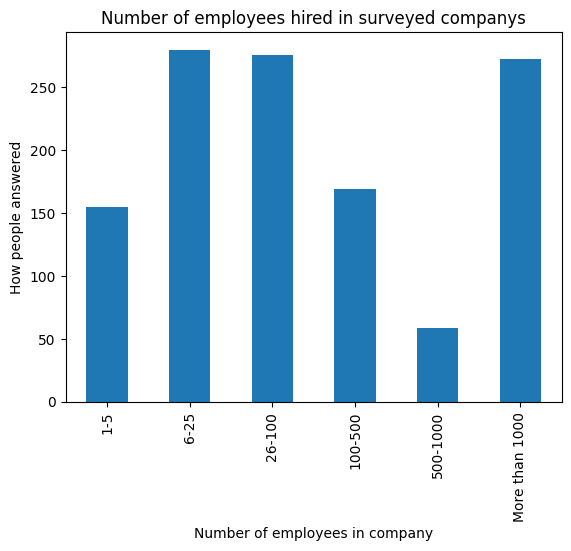

In [10]:
#kolejność wyświetlania kategorii na wykresie
order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']

#ułożenie w zapisanej kolejności
df['no_employees'].value_counts().reindex(order).plot(kind='bar')

plt.title('Number of employees hired in surveyed companys')

plt.xlabel('Number of employees in company')
plt.ylabel('How people answered')

plt.show()

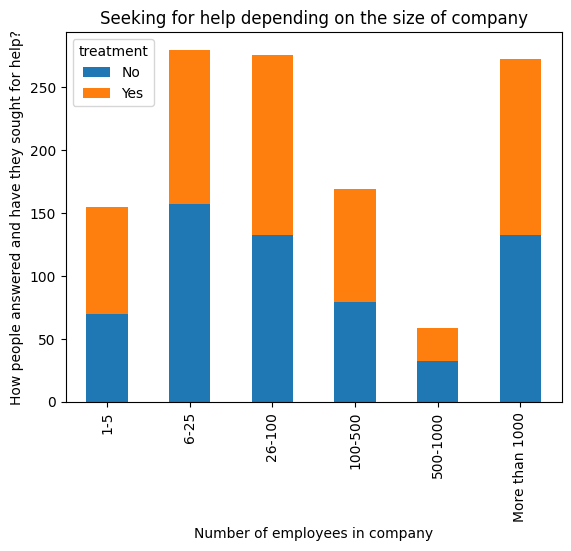

In [11]:
#tworzenie tabeli krzyżowej, grupującej liczbę osób, które potrzebują treatment w każdej z grup "number of employeed"
table = pd.crosstab(df['no_employees'], df['treatment'])

#uporządkowanie tego w kategorie zdefiniowane wcześniej
table = table.reindex(order)

#tworzenie wykresu słupkowego skumulowanego
table.plot(kind='bar', stacked=True)

plt.title('Seeking for help depending on the size of company')

plt.xlabel('Number of employees in company')
plt.ylabel('How people answered and have they sought for help?')

plt.show()

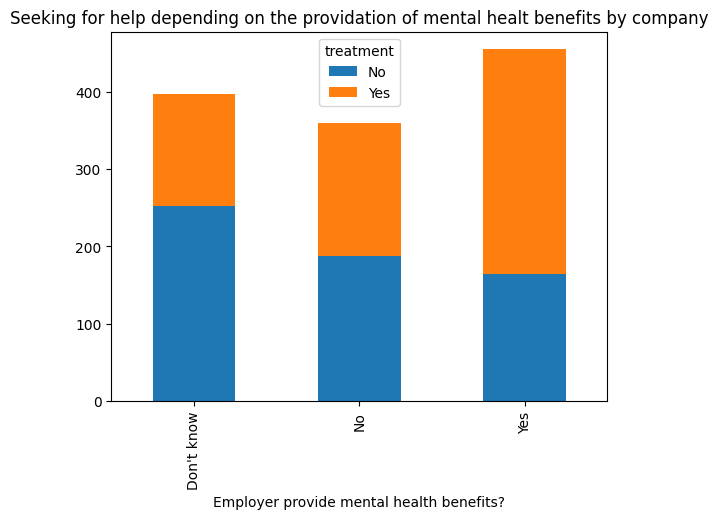

In [12]:
table = pd.crosstab(df['benefits'], df['treatment'])

table.plot(kind='bar', stacked=True)

plt.title('Seeking for help depending on the providation of mental healt benefits by company')

plt.xlabel('Employer provide mental health benefits?')

plt.show()

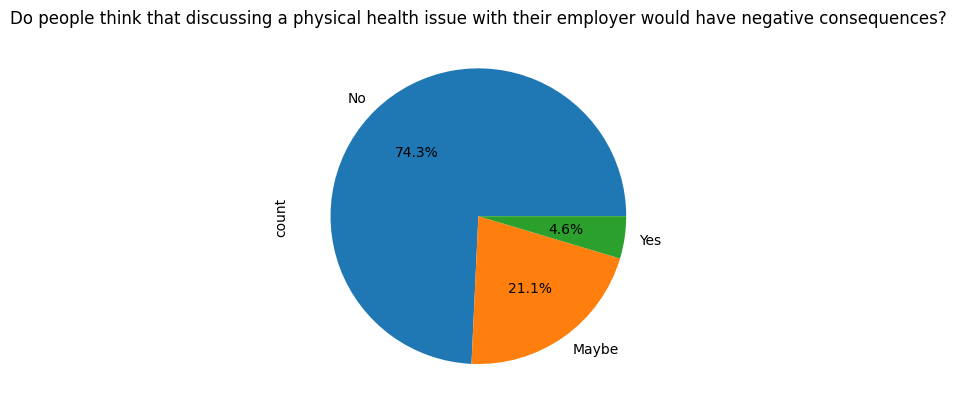

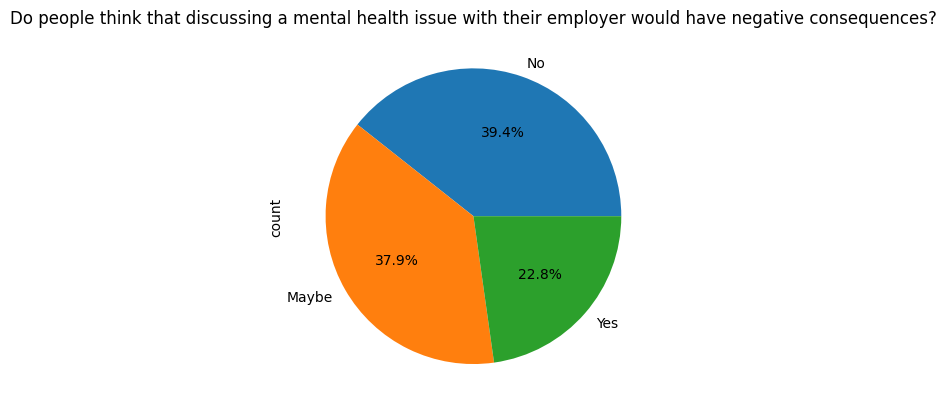

In [13]:
df['phys_health_consequence'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Do people think that discussing a physical health issue with their employer would have negative consequences?')

plt.show()

df['mental_health_consequence'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Do people think that discussing a mental health issue with their employer would have negative consequences?')

plt.show()

In [17]:
df['Age'].value_counts()

Age
 29      84
 32      78
 26      73
 33      67
 27      66
 28      65
 34      64
 31      64
 25      59
 30      59
 35      55
 23      50
 24      44
 37      42
 38      37
 36      37
 39      33
 40      32
 43      26
 22      21
 41      20
 42      19
 21      15
 45      12
 46      11
 44      11
 19       8
 18       6
 50       6
 20       6
 48       5
 51       5
 49       4
 56       4
 57       3
 54       3
 55       3
 47       2
 60       2
 329      1
 58       1
 62       1
 65       1
-29       1
-1726     1
 5        1
 53       1
 61       1
 11       1
 72       1
Name: count, dtype: int64

In [20]:
df = df[(df['Age'] > 15) & (df['Age'] < 80)]

#podział rekordów na przynależenie do określonej grupy wiekowej
granice = [15, 25, 35, 50, 80]
etykiety = ['15-25', '26-35', '36-50', '50+']

# Tworzenie nowej zmiennej kategorycznej
df['age_group'] = pd.cut(df['Age'], bins=granice, labels=etykiety, include_lowest=True)

df['age_group'].value_counts()

age_group
26-35    675
36-50    297
15-25    209
50+       26
Name: count, dtype: int64

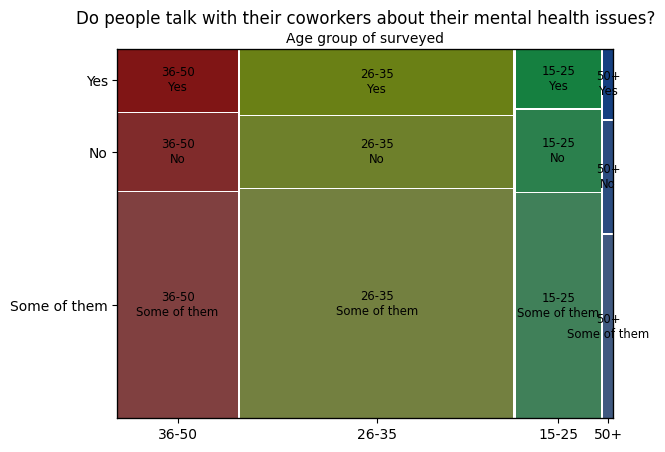

In [22]:
mosaic(df, ['age_group', 'coworkers'])

plt.title('Do people talk with their coworkers about their mental health issues?')
plt.xlabel('Age group of surveyed')

plt.show()